preamble

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy_fit as fit
%matplotlib inline

# data=np.loadtxt('.txt')

# fit.saveplot(fig_width=5.5)
# fig, ax = plt.subplots()
# ax.errorbar(,yerr=np.sqrt(range(12)),ms=3,mew=0.5,marker="x",ls='',lw=0.5,capsize=2,label='Werte')
# ax.plot(,lw=0.5,label='Fit')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# plt.legend()
# plt.show()
# plt.savefig("")
# fit.revert_params()

y-error with curve_fit  
R^2 should be near 1

In [47]:
x=np.arange(0,12,1)
y=np.array([1, 1, 3, 2, 4, 5, 6, 8, 9, 10, 10, 11])
xerr=np.sqrt(y)
yerr=np.sqrt(y)

def lin(x, a, b):
    return x * a + b

fit.exefit(lin,x,y,yerr=yerr)

#===== Results of Fit =====#
Fit model: lin
=== Parameter Values ===
Par. 1: 9.61e-01 +/- 7.15e-02
Par. 2: 4.00e-01 +/- 2.87e-01
=== Goodness of fit ===
R^2: 0.9650908099001132




with x-error use argument init for amount of variables  
Chi^2 should be near 0  
copy set to true gives code for matplotlib environment  
flag set to true gives visual of fit  

#===== Results of Fit =====#
Fit model: linx
=== Parameter Values ===
Par. 1: 9.87e-01 +/- 7.24e-02
Par. 2: 3.30e-01 +/- 2.90e-01
=== Goodness of fit ===
Chi^2: 0.09098610513026352

params=np.array([9.868e-01,3.299e-01])
ax.plot(x,linx(params,x),lw=0.5,label='Fit')




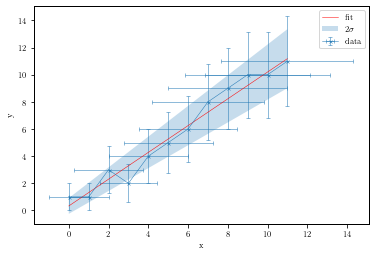

In [48]:
def linx(p, x):
     m, c = p
     return m * x + c

fit.exefit(linx,x,y,yerr=yerr,xerr=xerr,init=2,copy=1,flag=1)

exefit can be executed in matplotlib environment, set argument plot to the axis name of subplot, here ax  
set argument l to the label of fit  
this wont print results  

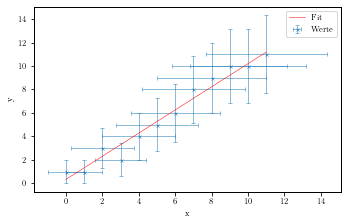

In [61]:
fit.saveplot(fig_width=5.5)
fig, ax = plt.subplots()
ax.errorbar(x,y,yerr=yerr,xerr=xerr,ms=3,mew=0.5,marker="x",ls='',lw=0.5,capsize=2,label='Werte')
fit.exefit(linx,x,y,yerr=yerr,xerr=xerr,plot=ax,l='Fit',init=2)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()
plt.savefig("plot.png")
plt.show()
fit.revert_params()

exefit_gauss fits with a gaussian, equation shown at the definition  
set argument offs to true to fit gaussian with offset  

In [50]:
data=np.loadtxt('ba.txt')
chl=data[:,0]
reac=data[:,1]
reac=reac[:500]
chl=chl[:500]

fit.exefit_gauss(chl,reac,copy=1,offs=1)

#===== Results of Fit =====#
Fit model: exefit_gauss.<locals>.gauss_offs
def gauss_offs(x,A,x0,sigma,b):
    return A*np.exp(-(x-x0)**2/(2.*sigma**2))+b
=== Parameter Values ===
A:     9.12e+02 +/- 4.47e+00
x0:    2.74e+02 +/- 2.33e-01
sigma: 4.31e+01 +/- 2.64e-01
b:     4.33e+01 +/- 1.85e+00
=== Goodness of fit ===
R^2: 0.9896689616216657

ax.plot(chl,gauss_offs(chl,9.123e+02,2.743e+02,4.307e+01,4.331e+01),lw=0.5,label='Fit')




results can be stored as lists with retoure set to true  
with this code the result is also shown  

#===== Results of Fit =====#
Fit model: exefit_gauss.<locals>.gauss_offs
def gauss_offs(x,A,x0,sigma,b):
    return A*np.exp(-(x-x0)**2/(2.*sigma**2))+b
=== Parameter Values ===
A:     9.12e+02 +/- 4.47e+00
x0:    2.74e+02 +/- 2.33e-01
sigma: 4.31e+01 +/- 2.64e-01
b:     4.33e+01 +/- 1.85e+00
=== Goodness of fit ===
R^2: 0.9896689616216657

ax.plot(chl,gauss_offs(chl,9.123e+02,2.743e+02,4.307e+01,4.331e+01),lw=0.5,label='Fit')
[912.2922057  274.34268288  43.06616503  43.31254786] [4.46828387 0.23287766 0.2636426  1.85130891]


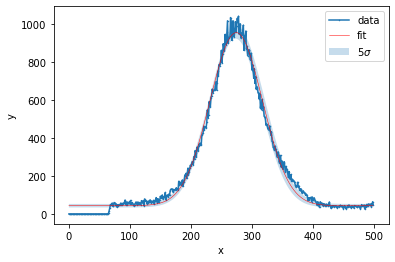

In [51]:
popt,pcov=fit.exefit_gauss(chl,reac,copy=1,flag=1,offs=1,retoure=1)
print(popt,pcov)

sciexpo returns value and error in ecientific notation with decimal exponent  
ltx set to 1 returns table code for latex with newline backslash  
ltx set to 2 without backslash  
tbl set to true gives python code for latex table  
cdot set to true returns code with decimal notation of error with latex cdot command

In [52]:
val=np.array([4.,30.,703.,12345678.,0.123,0.00089809])
err=np.array([2.,4.,0.005,12345.,0.12345,0.0000000009])

new_val, new_err, exp, rst=fit.sciexpo(val, err, ltx=1, tbl=1)

$\sciexpo{4.00}{2.00}$\\
$\sciexp{3.00}{0.40}{e1}$\\
$\sciexp{7.03}{\num{5.00e-5}}{e2}$\\
$\sciexp{1.23}{\num{1.23e-3}}{e7}$\\
$\sciexp{1.23}{1.23}{e-1}$\\
$\sciexp{8.98}{\num{9.00e-6}}{e-4}$\\
for i in range(len(val)):
    if exp[i]==0:
        if rst[i]==0:
            text.append(' $\\sciexpo{')
            text.append(f' {new_val[i]:.2f}')
            text.append(' }{')
            text.append(f' {new_err[i]:.2f}')
            text.append(' }$\\\\\n')
        else:
            text.append(' $\\sciexpo{')
            text.append(f' {new_val[i]:.2f}')
            text.append(' }{\\num{')
            text.append(f' {new_err[i]:.2f}e')
            text.append(f' {rst[i]}$')
            text.append('\\\\\n')
    else:
        if rst[i]==0:
            text.append(' $\\sciexp{')
            text.append(f' {new_val[i]:.2f}')
            text.append(' }{')
            text.append(f' {new_err[i]:.2f}')
            text.append(' }{e')
            text.append(f' {exp[i]}')
            text.ap

In [96]:
text = list()
text.append('\\begin{table}[h]\n')
text.append(' \\centering\n')
text.append(' \\begin{tabular}{l|l|l|l}\n')
text.append(' \\hline\n')
text.append(' \\end{tabular}\n')
text.append(' \\caption{caption}\n')
text.append('\\end{table}\n')

with open('table.tex', 'w') as f:
    f.writelines(text)

In [112]:
import io
import numpy as np

s = open('data.txt').read().replace(',','.')
data = np.loadtxt(io.StringIO.StringIO(s))
print(data)

AttributeError: type object '_io.StringIO' has no attribute 'StringIO'